# Rayleigh-Benard Convection In 2.5D
All derivatives in the y direction (longitudinal) are zero

## Imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
import h5py

from rayleighbenard import simulation, plotting, utils

# Change this to use a different directory for saving the data
data_dir = "./analysis"

print('Parameters to use:')
for k, v in utils.read_params(data_dir).items():
    print(f'{k} = {v}')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Parameters to use:
Ra = 30000.0
Pr = 1
Ek = 0.004
Theta = 0.3490658503988659
R = 100
resX = 128
resZ = 64
Lx = 4
Lz = 1
duration = 2
timestep = 1e-05
timestep_analysis = 0.005


## The simulation

In [2]:
simulation.run(data_dir)

2021-11-01 18:20:27,015 pencil 0/1 INFO :: Building pencil matrix 1/64 (~2%) Elapsed: 0s, Remaining: 1s, Rate: 4.7e+01/s
2021-11-01 18:20:27,139 pencil 0/1 INFO :: Building pencil matrix 7/64 (~11%) Elapsed: 0s, Remaining: 1s, Rate: 4.8e+01/s
2021-11-01 18:20:27,269 pencil 0/1 INFO :: Building pencil matrix 14/64 (~22%) Elapsed: 0s, Remaining: 1s, Rate: 5.1e+01/s
2021-11-01 18:20:27,399 pencil 0/1 INFO :: Building pencil matrix 21/64 (~33%) Elapsed: 0s, Remaining: 1s, Rate: 5.2e+01/s
2021-11-01 18:20:27,538 pencil 0/1 INFO :: Building pencil matrix 28/64 (~44%) Elapsed: 1s, Remaining: 1s, Rate: 5.1e+01/s
2021-11-01 18:20:27,675 pencil 0/1 INFO :: Building pencil matrix 35/64 (~55%) Elapsed: 1s, Remaining: 1s, Rate: 5.1e+01/s
2021-11-01 18:20:27,809 pencil 0/1 INFO :: Building pencil matrix 42/64 (~66%) Elapsed: 1s, Remaining: 0s, Rate: 5.2e+01/s
2021-11-01 18:20:27,938 pencil 0/1 INFO :: Building pencil matrix 49/64 (~77%) Elapsed: 1s, Remaining: 0s, Rate: 5.2e+01/s
2021-11-01 18:20:28

## Analysis
Tasks in this section can be run without running the simulation above, as long as it has been run before in the specified directory

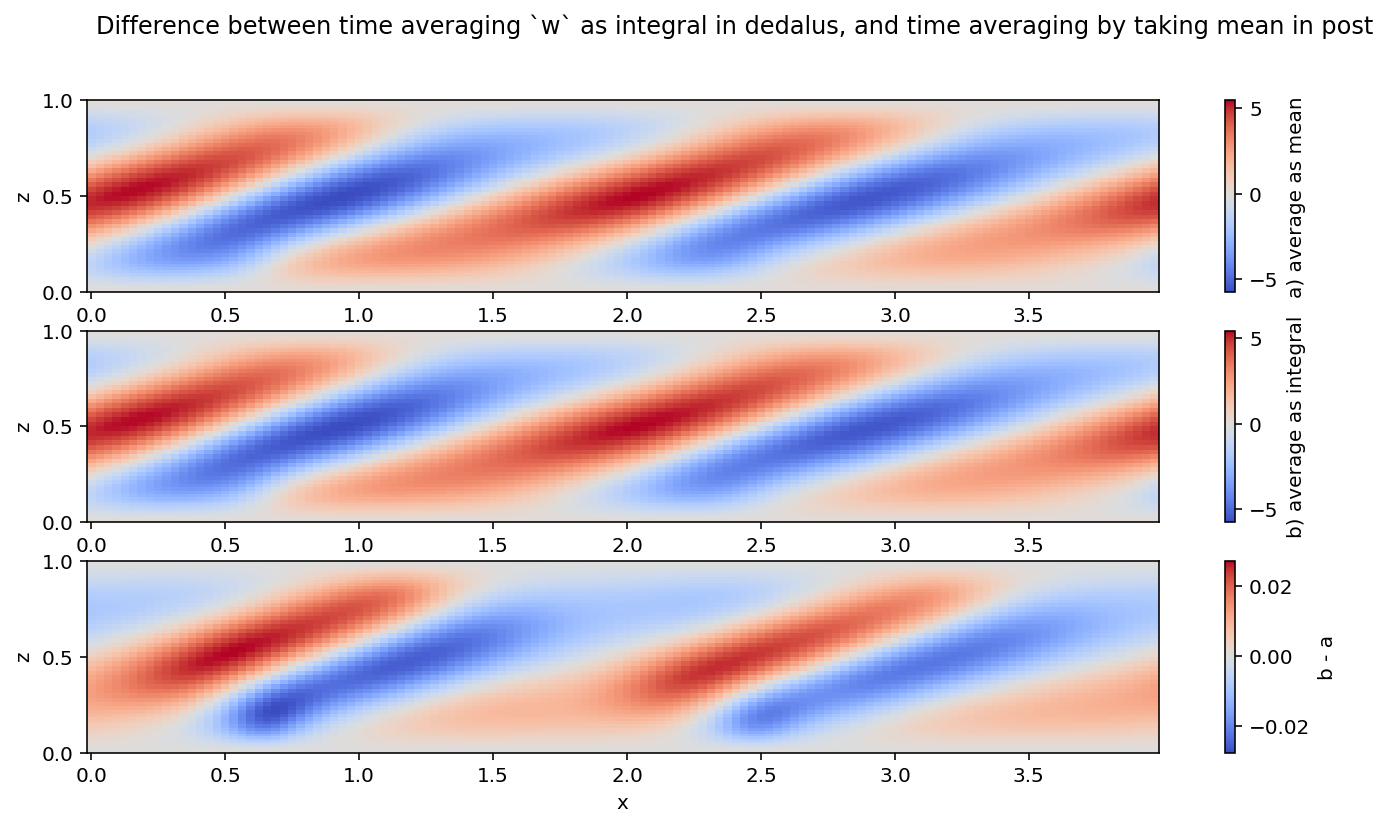

In [3]:
params = utils.read_params(data_dir)
with h5py.File("{}/analysis.h5".format(data_dir), mode='r') as file:
    avg_time = params['duration']
    
    t = np.array(file['tasks']['T'].dims[0]['sim_time'])
    x = np.array(file['tasks']['T'].dims[1][0])
    z = np.array(file['tasks']['T'].dims[2][0])
    
    w = np.array(file['tasks']['w'])
    w_avgt = np.mean(w[t >= params['duration'] - avg_time], axis=0)
    w_intt = np.array(file['tasks']['w_avgt'])[-1] / avg_time
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(3, 1, 1)
    pcm = ax.pcolormesh(x, z, w_avgt.T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='a) average as mean', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    ax = fig.add_subplot(3, 1, 2)
    pcm = ax.pcolormesh(x, z, w_intt.T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='b) average as integral', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    ax = fig.add_subplot(3, 1, 3)
    pcm = ax.pcolormesh(x, z, (w_intt - w_avgt).T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='b - a', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    fig.suptitle("Difference between time averaging `w` as integral in dedalus, and time averaging by taking mean in post")
    plt.show()

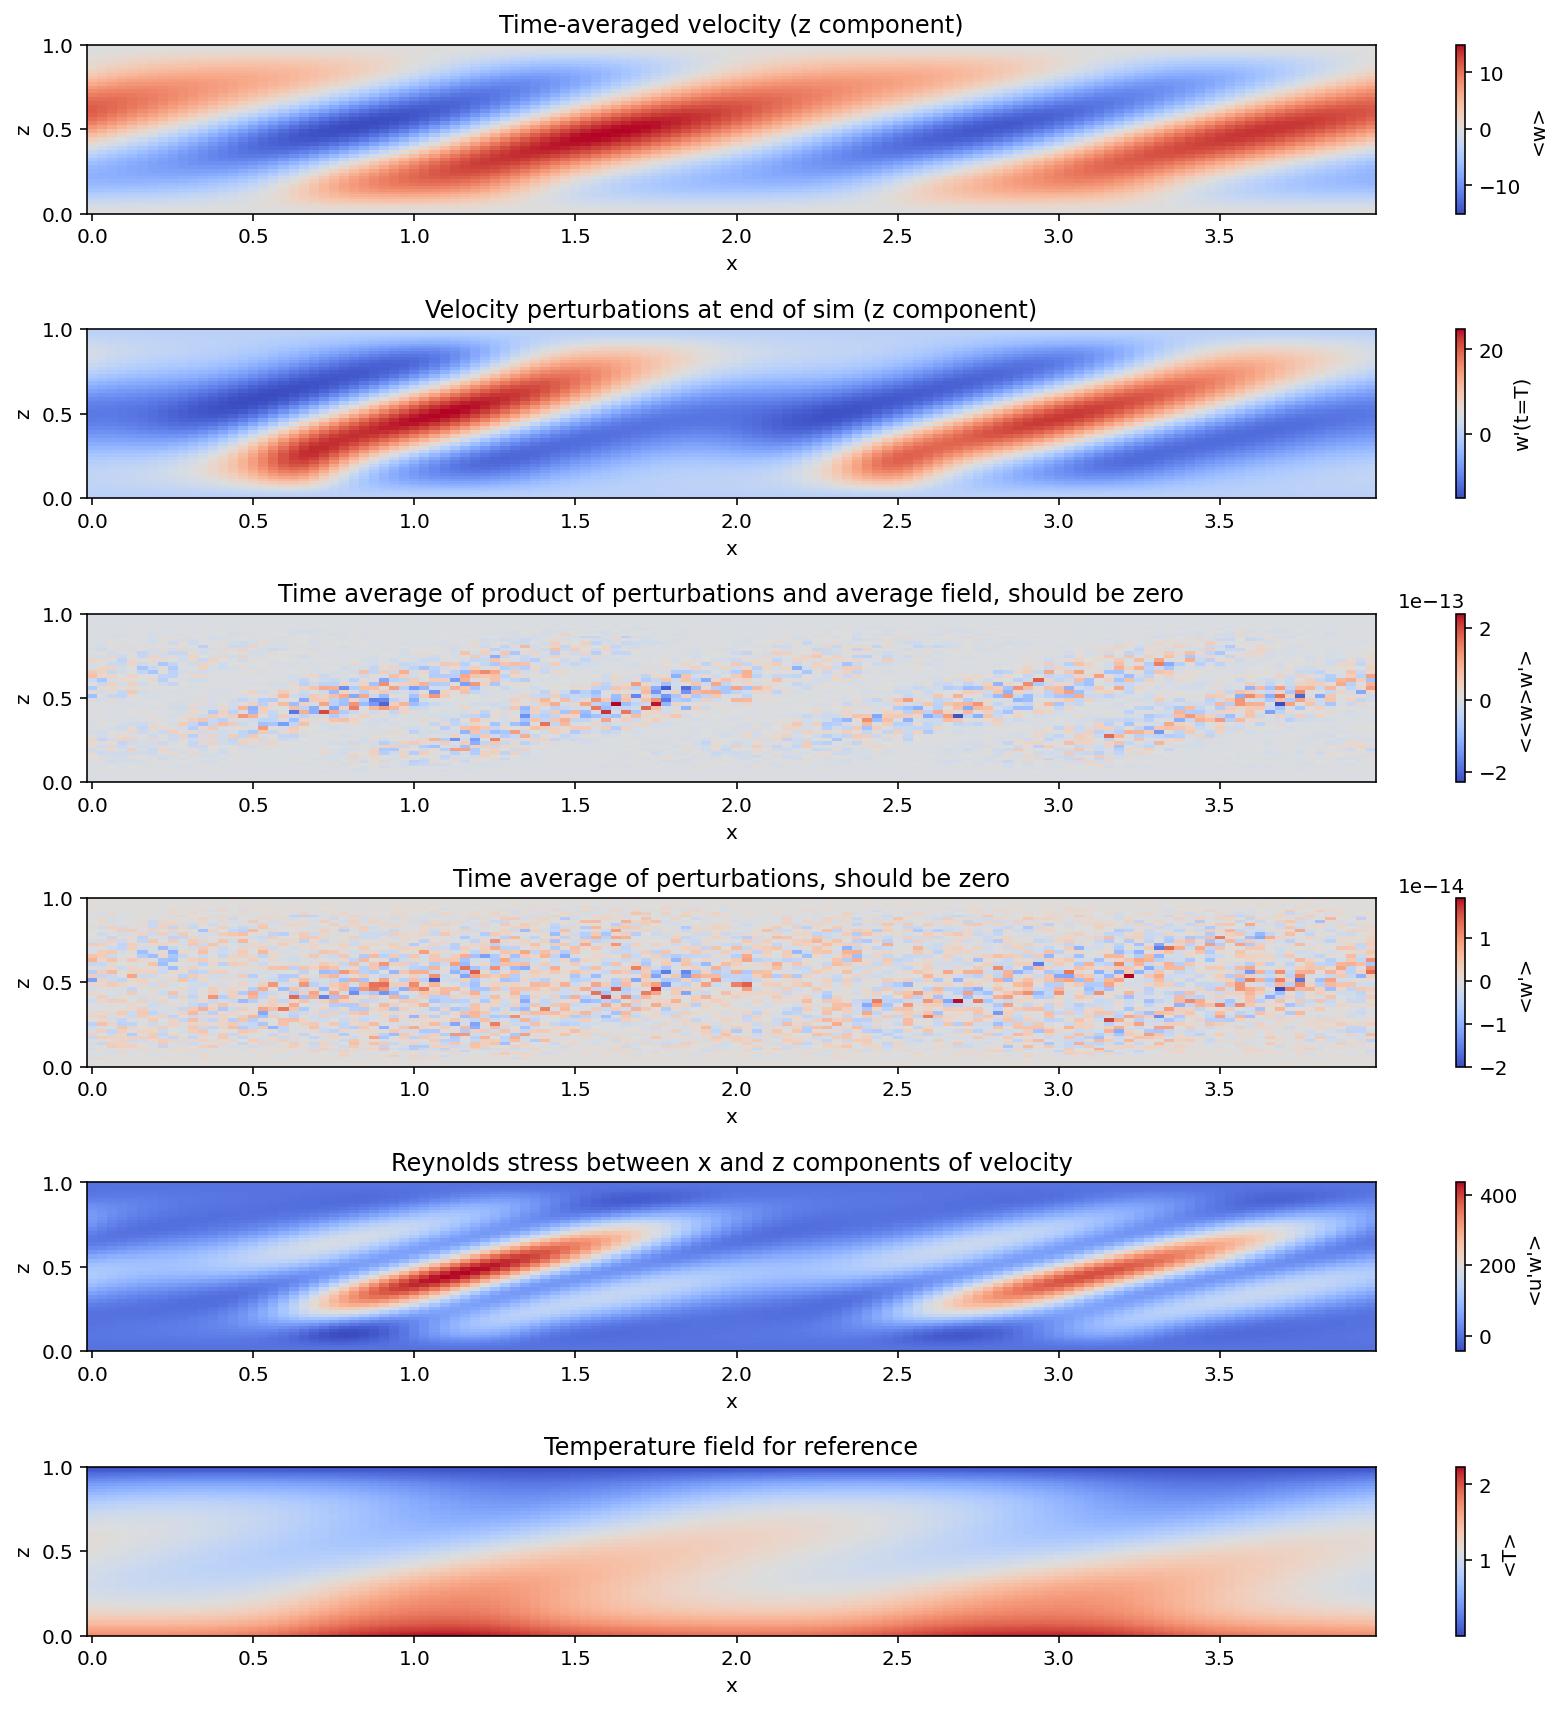

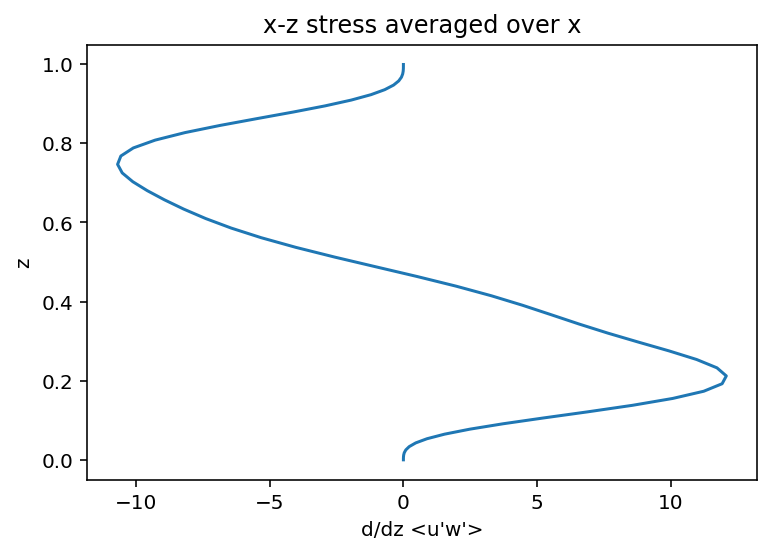

In [10]:
params = utils.read_params(data_dir)
with h5py.File("{}/analysis.h5".format(data_dir), mode='r') as file:
    avg_time = 1
    
    T = np.array(file['tasks']['T'])
    t = np.array(file['tasks']['T'].dims[0]['sim_time'])
    x = np.array(file['tasks']['T'].dims[1][0])
    z = np.array(file['tasks']['T'].dims[2][0])
    
    T_avgt = np.mean(T[t >= params['duration'] - avg_time], axis=0)
    
    u = np.array(file['tasks']['u'])
    u_avgt = np.mean(u[t >= params['duration'] - avg_time], axis=0)
    u_pert = u - np.stack([u_avgt]*u.shape[0], axis=0)
    
    w = np.array(file['tasks']['w'])
    w_avgt = np.mean(w[t >= params['duration'] - avg_time], axis=0)
    w_pert = w - np.stack([w_avgt]*w.shape[0], axis=0)
    
    w_pert_avgt = np.mean(w_pert[t >= params['duration'] - avg_time], axis=0)
    w_mixed_avgt = np.mean((w_avgt*w_pert)[t >= params['duration'] - avg_time], axis=0)
    stress_uw = np.mean((u_pert*w_pert)[t >= params['duration'] - avg_time], axis=0)
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(6, 1, 1)
    ax.set_title("Time-averaged velocity (z component)")
    pcm = ax.pcolormesh(x, z, w_avgt.T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='<w>', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    ax = fig.add_subplot(6, 1, 2)
    ax.set_title("Velocity perturbations at end of sim (z component)")
    pcm = ax.pcolormesh(x, z, w_pert[-1].T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='w\'(t=T)', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    ax = fig.add_subplot(6, 1, 3)
    ax.set_title("Time average of product of perturbations and average field, should be zero")
    pcm = ax.pcolormesh(x, z, w_mixed_avgt.T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='<<w>w\'>', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    ax = fig.add_subplot(6, 1, 4)
    ax.set_title("Time average of perturbations, should be zero")
    pcm = ax.pcolormesh(x, z, w_pert_avgt.T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='<w\'>', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    ax = fig.add_subplot(6, 1, 5)
    ax.set_title("Reynolds stress between x and z components of velocity")
    pcm = ax.pcolormesh(x, z, stress_uw.T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='<u\'w\'>', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    
    ax = fig.add_subplot(6, 1, 6)
    ax.set_title("Temperature field for reference")
    pcm = ax.pcolormesh(x, z, T_avgt.T, shading='nearest', cmap="coolwarm")
    fig.colorbar(pcm, label='<T>', ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    plt.tight_layout()
    plt.show()
    
    stress_uw_avgx = np.mean(stress_uw, axis=0)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("x-z stress averaged over x")
    ax.plot(np.diff(stress_uw_avgx), z[:-1])
    ax.set_xlabel('d/dz <u\'w\'>')
    ax.set_ylabel('z')
    plt.show()
    

In [ ]:
plotting.time_averaged(data_dir)

In [ ]:
plotting.final_state(data_dir)

In [5]:
plotting.video(data_dir)
display(Video(data_dir + "/video.mp4"))

2021-11-01 18:29:47,905 matplotlib.animation 0/1 INFO :: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-11-01 18:29:47,910 matplotlib.animation 0/1 INFO :: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1400x350 -pix_fmt rgba -r 6.666666666666667 -i pipe: -vcodec h264 -pix_fmt yuv420p -y ./analysis/video.mp4


In [ ]:
plotting.average_temp(data_dir)

In [ ]:
plotting.average_vel(data_dir)

In [ ]:
plotting.heat_flux(data_dir)

In [ ]:
plotting.ang_mom_flux(data_dir)

In [ ]:
plotting.heat_flux_spectra(data_dir)

In [ ]:
plotting.angmom_flux_spectra(data_dir)